<a href="https://colab.research.google.com/github/Nasir-Sharif/Google-Colab-File-LSTM-Based-Text-Generation-Model/blob/main/LSTM%20Based%20Next%20Text%20Generation%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM

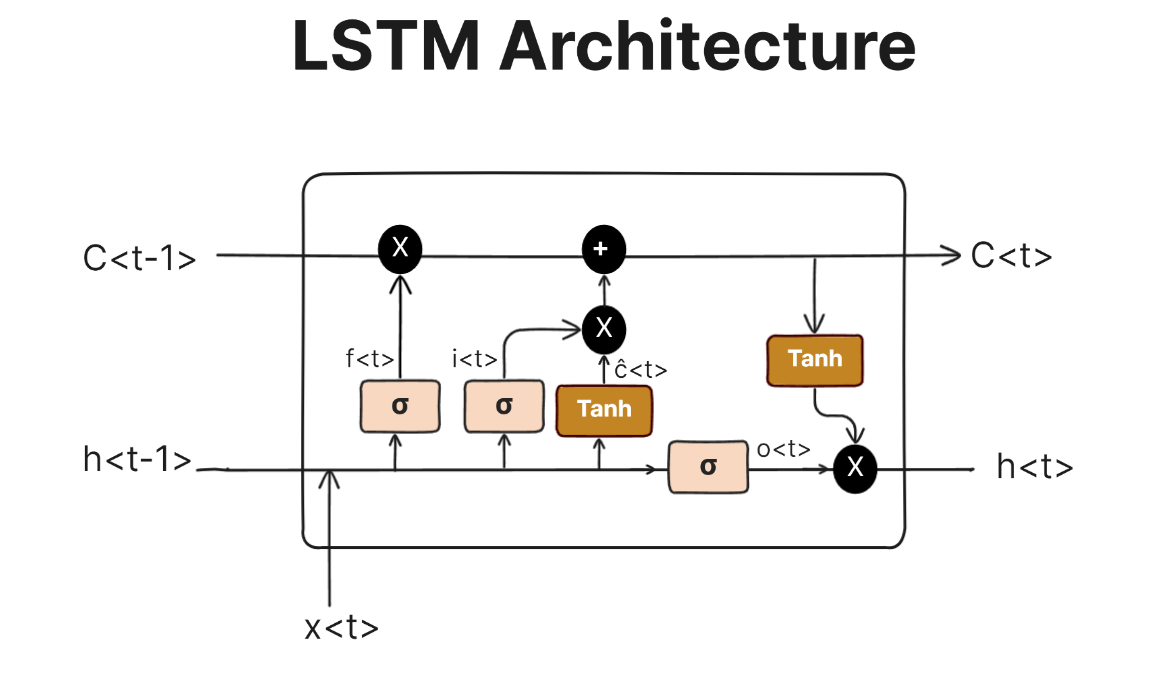

Install NLTK

In [1]:
!pip install nltk

What is NLTK?

NLTK stands for Natural Language Toolkit.

It is a powerful Python library used for natural language processing (NLP) tasks.



What Can NLTK Do?

NLTK provides tools to help computers understand, interpret, and manipulate human language.

Some key features:

- `Tokenization`: Breaking text into words or sentences
- `Stopword removal`: 	Removing common words like "the", "is", "in"
- `Stemming`:	Reducing words to their root form (e.g., “running” → “run”)
- `Lemmatization`:	Like stemming, but more accurate (e.g., “better” → “good”)
- `POS tagging`: Part-of-speech tagging (e.g., "run" = verb or noun?)
- `Text Classification`:	Sentiment analysis, spam detection, etc.

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from collections import Counter
from torch.utils.data import Dataset, DataLoader
from nltk.tokenize import word_tokenize
import nltk

In [3]:
document = """About the Program
What is the course fee for  Data Science Mentorship Program (DSMP 2023)
The course follows a monthly subscription model where you have to make monthly payments of Rs 799/month.
What is the total duration of the course?
The total duration of the course is 7 months. So the total course fee becomes 799*7 = Rs 5600(approx.)
What is the syllabus of the mentorship program?
We will be covering the following modules:
Python Fundamentals
Python libraries for Data Science
Data Analysis
SQL for Data Science
Maths for Machine Learning
ML Algorithms
Practical ML
MLOPs
Case studies
You can check the detailed syllabus here - https://learnwith.campusx.in/courses/CampusX-Data-Science-Mentorship-Program-637339afe4b0615a1bbed390
Will Deep Learning and NLP be a part of this program?
No, NLP and Deep Learning both are not a part of this program’s curriculum.
What if I miss a live session? Will I get a recording of the session?
Yes all our sessions are recorded, so even if you miss a session you can go back and watch the recording.
Where can I find the class schedule?
Checkout this google sheet to see month by month time table of the course - https://docs.google.com/spreadsheets/d/16OoTax_A6ORAeCg4emgexhqqPv3noQPYKU7RJ6ArOzk/edit?usp=sharing.
What is the time duration of all the live sessions?
Roughly, all the sessions last 2 hours.
What is the language spoken by the instructor during the sessions?
Hinglish
How will I be informed about the upcoming class?
You will get a mail from our side before every paid session once you become a paid user.
Can I do this course if I am from a non-tech background?
Yes, absolutely.
I am late, can I join the program in the middle?
Absolutely, you can join the program anytime.
If I join/pay in the middle, will I be able to see all the past lectures?
Yes, once you make the payment you will be able to see all the past content in your dashboard.
Where do I have to submit the task?
You don’t have to submit the task. We will provide you with the solutions, you have to self evaluate the task yourself.
Will we do case studies in the program?
Yes.
Where can we contact you?
You can mail us at nitish.campusx@gmail.com
Payment/Registration related questions
Where do we have to make our payments? Your YouTube channel or website?
You have to make all your monthly payments on our website. Here is the link for our website - https://learnwith.campusx.in/
Can we pay the entire amount of Rs 5600 all at once?
Unfortunately no, the program follows a monthly subscription model.
What is the validity of monthly subscription? Suppose if I pay on 15th Jan, then do I have to pay again on 1st Feb or 15th Feb
15th Feb. The validity period is 30 days from the day you make the payment. So essentially you can join anytime you don’t have to wait for a month to end.
What if I don’t like the course after making the payment. What is the refund policy?
You get a 7 days refund period from the day you have made the payment.
I am living outside India and I am not able to make the payment on the website, what should I do?
You have to contact us by sending a mail at nitish.campusx@gmail.com
Post registration queries
Till when can I view the paid videos on the website?
This one is tricky, so read carefully. You can watch the videos till your subscription is valid. Suppose you have purchased subscription on 21st Jan, you will be able to watch all the past paid sessions in the period of 21st Jan to 20th Feb. But after 21st Feb you will have to purchase the subscription again.
But once the course is over and you have paid us Rs 5600(or 7 installments of Rs 799) you will be able to watch the paid sessions till Aug 2024.
Why lifetime validity is not provided?
Because of the low course fee.
Where can I reach out in case of a doubt after the session?
You will have to fill a google form provided in your dashboard and our team will contact you for a 1 on 1 doubt clearance session
If I join the program late, can I still ask past week doubts?
Yes, just select past week doubt in the doubt clearance google form.
I am living outside India and I am not able to make the payment on the website, what should I do?
You have to contact us by sending a mail at nitish.campusx@gmai.com
Certificate and Placement Assistance related queries
What is the criteria to get the certificate?
There are 2 criterias:
You have to pay the entire fee of Rs 5600
You have to attempt all the course assessments.
I am joining late. How can I pay payment of the earlier months?
You will get a link to pay fee of earlier months in your dashboard once you pay for the current month.
I have read that Placement assistance is a part of this program. What comes under Placement assistance?
This is to clarify that Placement assistance does not mean Placement guarantee. So we dont guarantee you any jobs or for that matter even interview calls. So if you are planning to join this course just for placements, I am afraid you will be disappointed. Here is what comes under placement assistance
Portfolio Building sessions
Soft skill sessions
Sessions with industry mentors
Discussion on Job hunting strategies
"""


In [47]:
# Tokenization

nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [48]:
# tokenize
tokens = word_tokenize(document.lower())

In [49]:
document.islower()


False

In [50]:
# # build vocab
# vocab = {'<unk>':0}

# for token in Counter(tokens).keys():
#   if token not in vocab:
#     vocab[token] = len(vocab)

# vocab

# 1) vocab fix
vocab = {'<pad>':0, '<unk>':1}
idx = 2
for token in Counter(tokens).keys():
    if token not in vocab:
        vocab[token] = idx; idx += 1
inv_vocab = {v:k for k,v in vocab.items()}

In [51]:
len(vocab)

290

In [52]:
input_sentences = document.split('\n')
len(input_sentences)

78

text -> numerical indices

In [9]:
def text_to_indices(sentence, vocab):

  numerical_sentence = []

  for token in sentence:
    if token in vocab:
      numerical_sentence.append(vocab[token])
    else:
      numerical_sentence.append(vocab['<unk>'])

  return numerical_sentence


In [10]:
input_numerical_sentences = []

for sentence in input_sentences:
  input_numerical_sentences.append(text_to_indices(word_tokenize(sentence.lower()), vocab))


In [11]:
len(input_numerical_sentences)

78

Create training sequence

In [12]:
training_sequence = []
for sentence in input_numerical_sentences:

  for i in range(1, len(sentence)):
    training_sequence.append(sentence[:i+1])

In [13]:
len(training_sequence)

942

Check First Five Training Sequence

In [14]:
training_sequence[:5]

[[1, 2], [1, 2, 3], [4, 5], [4, 5, 2], [4, 5, 2, 6]]

Fint out the Maximum Length of sequence

In [15]:
len_list = []

for sequence in training_sequence:
  len_list.append(len(sequence))

max(len_list)

62

Check the First Sequence Length

In [16]:
training_sequence[0]

[1, 2]

- Maximum Sequence Length => 62
- But First Srquence Length => 2

Now, We have to make the sequence length equal in order to feed them to networt. To solve this issue, we have to use `Padding`

**What is Padding?**

Padding means adding extra values (usually zeros) to a sequence to make all sequences in a batch the same length.

Why?
- Neural networks (especially RNNs, LSTMs) expect inputs of the same length across batches. Since sentences or sequences usually vary in length, we "pad" shorter ones to match the longest sequence.

Types:

- `Pre-padding` means adding padding values at the beginning of the sequence.

 Example: Suppose `max length = 5`, and your original sequence is: `[4, 5, 6]`

 After pre-padding `(with 0)`: `[0, 0, 4, 5, 6]`

- `Post-padding` means adding padding values at the end of the sequence.

 Example:  Original sequence: `[4, 5, 6]`

 After post-padding `(with 0)`: `[4, 5, 6, 0, 0]`



In [17]:
padded_training_sequence = []
for sequence in training_sequence:

  padded_training_sequence.append([0]*(max(len_list) - len(sequence)) + sequence)

In [18]:
len(padded_training_sequence[10])

62

In [19]:
padded_training_sequence = torch.tensor(padded_training_sequence, dtype=torch.long)

In [20]:
padded_training_sequence

tensor([[  0,   0,   0,  ...,   0,   1,   2],
        [  0,   0,   0,  ...,   1,   2,   3],
        [  0,   0,   0,  ...,   0,   4,   5],
        ...,
        [  0,   0,   0,  ..., 285, 176, 286],
        [  0,   0,   0,  ..., 176, 286, 287],
        [  0,   0,   0,  ..., 286, 287, 288]])

Now, split the `padded sequence` into `input` & `output`. Such that:
- input : extract the `all` values from the padded sequence except `last one`
- output : extract the `last one value`

In [21]:
X = padded_training_sequence[:, :-1]
y = padded_training_sequence[:,-1]

In [22]:
X

tensor([[  0,   0,   0,  ...,   0,   0,   1],
        [  0,   0,   0,  ...,   0,   1,   2],
        [  0,   0,   0,  ...,   0,   0,   4],
        ...,
        [  0,   0,   0,  ...,   0, 285, 176],
        [  0,   0,   0,  ..., 285, 176, 286],
        [  0,   0,   0,  ..., 176, 286, 287]])

In [23]:
y

tensor([  2,   3,   5,   2,   6,   7,   8,   9,  10,  11,   3,  12,  13,  14,
         15,   6,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  18,  26,
         27,  28,  29,  30,   5,   2,  31,  32,  27,   2,   6,  33,  31,  32,
         27,   2,   6,   5,  34,  35,  30,  36,   2,  31,   6,   7,  37,  38,
         39,  34,  40,  28,  41,  12,  42,  30,  15,   5,   2,  43,  27,   2,
         11,   3,  33,  45,  46,  47,   2,  48,  49,  50,  52,  53,   8,   9,
         10,  54,   8,   9,  10,   8,  57,  58,  60,  59,  64,  65,  66,   2,
         67,  43,  68,  69,  70,  50,  71,  72,  58,  73,  74,  46,  17,  75,
         27,  76,   3,  33,  78,  74,  73,  72,  58,  79,  80,  81,  17,  75,
         27,  76,   3,  82,  83,  84,  30,  85,  86,  87,  17,  88,  89,  33,
         45,  86,  90,  17,  91,  27,   2,  89,  33,  93,  94,  95,  80,  96,
         78,  36,  97,  85,  22,  87,  17,  89,  22,  65,  98,  99,  73, 100,
          2,  91,  30,  65,  86, 101,   2, 102, 103,  33,  76, 1

Create Custom Dataset Class

In [26]:
class CustomDataset(Dataset):

  def __init__(self, X, y):
    self.X = X
    self.y = y #output

  def __len__(self):
    return self.X.shape[0]

  def __getitem__(self, idx):
    return self.X[idx], self.y[idx]

Instance of Custom Dataset Class

In [27]:
dataset = CustomDataset(X,y)

In [28]:
len(dataset)

942

Now, create dataloader

In [29]:
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

Custom LSTM Model

In [30]:
class LSTMModel(nn.Module):

  def __init__(self, vocab_size):
    super().__init__()
    self.embedding = nn.Embedding(vocab_size, 100)
    self.lstm = nn.LSTM(100, 150, batch_first=True)
    self.fc = nn.Linear(150, vocab_size)

  def forward(self, x):
    embedded = self.embedding(x)
    intermediate_hidden_states, (final_hidden_state, final_cell_state) = self.lstm(embedded)
    output = self.fc(final_hidden_state.squeeze(0))
    return output

Intance of Custom LSTM Model

In [31]:
model = LSTMModel(len(vocab))

check the cuda availability

In [32]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

move the model to cuda

In [33]:
model.to(device)

LSTMModel(
  (embedding): Embedding(289, 100)
  (lstm): LSTM(100, 150, batch_first=True)
  (fc): Linear(in_features=150, out_features=289, bias=True)
)

In [34]:
# Hyperparameters

epochs = 50
learning_rate = 0.001

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [35]:
# training loop

for epoch in range(epochs):
  total_loss = 0

  for batch_x, batch_y in dataloader:

    batch_x, batch_y = batch_x.to(device), batch_y.to(device)

    optimizer.zero_grad()

    output = model(batch_x)

    loss = criterion(output, batch_y)

    loss.backward()

    optimizer.step()

    total_loss = total_loss + loss.item()

  print(f"Epoch: {epoch + 1}, Loss: {total_loss:.4f}")

Epoch: 1, Loss: 165.8879
Epoch: 2, Loss: 146.2278
Epoch: 3, Loss: 134.0251
Epoch: 4, Loss: 122.2593
Epoch: 5, Loss: 109.6670
Epoch: 6, Loss: 98.2481
Epoch: 7, Loss: 87.3625
Epoch: 8, Loss: 78.1228
Epoch: 9, Loss: 69.2079
Epoch: 10, Loss: 61.2905
Epoch: 11, Loss: 53.6529
Epoch: 12, Loss: 47.3503
Epoch: 13, Loss: 41.4854
Epoch: 14, Loss: 36.5930
Epoch: 15, Loss: 31.9414
Epoch: 16, Loss: 28.1642
Epoch: 17, Loss: 24.9894
Epoch: 18, Loss: 22.2568
Epoch: 19, Loss: 19.8488
Epoch: 20, Loss: 17.7536
Epoch: 21, Loss: 16.0123
Epoch: 22, Loss: 14.4355
Epoch: 23, Loss: 13.1980
Epoch: 24, Loss: 12.2042
Epoch: 25, Loss: 11.0191
Epoch: 26, Loss: 10.3171
Epoch: 27, Loss: 9.4492
Epoch: 28, Loss: 8.8913
Epoch: 29, Loss: 8.3395
Epoch: 30, Loss: 7.8675
Epoch: 31, Loss: 7.5096
Epoch: 32, Loss: 7.2059
Epoch: 33, Loss: 6.8270
Epoch: 34, Loss: 6.5136
Epoch: 35, Loss: 6.2958
Epoch: 36, Loss: 6.1370
Epoch: 37, Loss: 5.7787
Epoch: 38, Loss: 5.6890
Epoch: 39, Loss: 5.5955
Epoch: 40, Loss: 5.4305
Epoch: 41, Loss: 5

In [36]:
output.shape

torch.Size([14, 289])

In [37]:
# prediction

def prediction(model, vocab, text):

  # tokenize
  tokenized_text = word_tokenize(text.lower())

  # text -> numerical indices
  numerical_text = text_to_indices(tokenized_text, vocab)

  # padding
  padded_text = torch.tensor([0] * (61 - len(numerical_text)) + numerical_text, dtype=torch.long).unsqueeze(0)

  # send to model
  output = model(padded_text)

  # convert logit to probs
  probs = torch.nn.functional.softmax(output, dim=1)

  # predicted index
  value, index = torch.max(probs, dim=1)

  # merge with text
  return text + " " + list(vocab.keys())[index]

In [38]:
prediction(model, vocab, "The course follows a monthly")

'The course follows a monthly subscription'

In [39]:
import time

num_tokens = 10
input_text = "hi how are"

for i in range(num_tokens):
  output_text = prediction(model, vocab, input_text)
  print(output_text)
  input_text = output_text
  time.sleep(0.5)


hi how are will
hi how are will i
hi how are will i be
hi how are will i be informed
hi how are will i be informed about
hi how are will i be informed about the
hi how are will i be informed about the upcoming
hi how are will i be informed about the upcoming class
hi how are will i be informed about the upcoming class ?
hi how are will i be informed about the upcoming class ? ?


In [40]:
dataloader1 = DataLoader(dataset, batch_size=32, shuffle=False)

In [53]:
# Function to calculate accuracy
def calculate_accuracy(model, dataloader, device):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():  # No need to compute gradients
        for batch_x, batch_y in dataloader1:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)

            # Get model predictions
            outputs = model(batch_x)

            # convert logit to probs
            probs = torch.nn.functional.softmax(outputs, dim=1)

            # Get the predicted word indices
            _, predicted = torch.max(probs, dim=1)

            # Compare with actual labels
            correct += (predicted == batch_y).sum().item()
            total += batch_y.size(0)

    accuracy = (correct / total) * 100
    return accuracy

# Compute accuracy
accuracy = calculate_accuracy(model, dataloader, device)
print(f"Model Accuracy: {accuracy:.2f}%")


Model Accuracy: 95.65%
